In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
from scipy import stats
npr.seed(123)

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

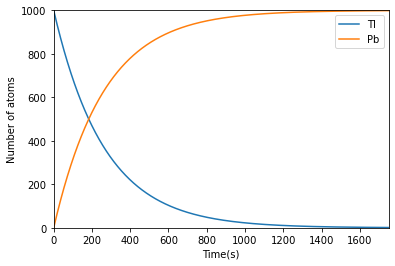

In [2]:
N0_Tl = 1000 

def p(t, tau = 3.052*60):
    return 1-2**(-t/tau)

time = np.arange(2000)

Tl_decay = []

for i in range(time.size):
    Tl_decay.append(p(i))

N_Tl = N0_Tl - np.array(Tl_decay)*N0_Tl
N_Pb = np.array(Tl_decay)*N0_Tl


plt.plot(time, N_Tl, label='Tl')
plt.plot(time, N_Pb, label='Pb')
plt.xlabel("Time(s)")
plt.ylabel("Number of atoms")
plt.xlim(0,1750)
plt.ylim(0,1000)
plt.legend()
plt.show()

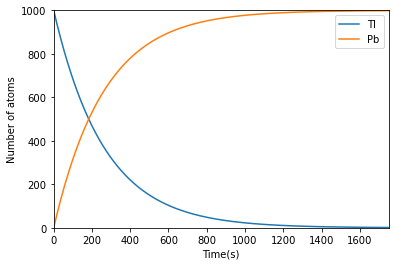

In [3]:
def p2(t,tau=3.052*60):
    return 2**(-t/tau)*np.log(2)/tau

prob = p2(time)

t_random = npr.choice(time, size=1000, replace=False, p=prob/sum(prob))
t_random.sort()


N_Tl = N0_Tl - p(t_random)*N0_Tl
N_Pb = p(t_random)*N0_Tl


plt.plot(t_random, N_Tl, label='Tl')
plt.plot(t_random, N_Pb, label='Pb')
plt.xlabel("Time(s)")
plt.ylabel("Number of atoms")
plt.xlim(0,1750)
plt.ylim(0,1000)
plt.legend()
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
Z = 79
e = 1.6e-19
epsilon0 = 8.85e-12
E = (7.7e6)*e
a0 = 5.29e-11
N = int(1e6)
sigma = a0/100

z = np.random.random(N)
b = np.sqrt(-2*np.log(1-z)*sigma**2)


theta = 2*np.arctan((Z*e**2)/(2*np.pi*epsilon0*E*b))

x = (len(theta[theta>np.pi/2])) / N
print("The fraction of particles that bounce back is: ", x)

The fraction of particles that bounce back is:  0.001534


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [5]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

I_true=1.4514
print("Expected result of integration: I = ",I_true)

# Monte Carlo integration
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print("\nMonte Carlo integration: I = ",I)
print ("relative error:","{:.5f}".format(np.abs(I - I_true)/I_true))

#Mean value method
z = np.random.uniform(size=N)
a = 0
b = 2
I_mean = ((b-a)/N)*sum(f(z))
print("\nMean value method: I =","{:.5f}".format(I_mean))
print ("relative error:","{:.5f}".format(np.abs(I_mean - I_true)/I_true))

Expected result of integration: I =  1.4514

Monte Carlo integration: I =  1.45148
relative error: 0.00006

Mean value method: I = 1.45202
relative error: 0.00043


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
N=100000
x = np.random.uniform(-1.0,1.0,size=N)
y = np.random.uniform(-1.0,1.0,size=N)
r = np.sqrt(x**2+y**2)
area = (4/N) * len(r[r<=1.0])
print("Area of a circle of unit radius: ",area)



def n_sphere(dim):
    count_in_sphere = 0
    N = 100000
    for i in range(N):
        point = np.random.uniform(-1.0, 1.0, dim)
        r = np.linalg.norm(point)
        if r <= 1.0:
            count_in_sphere += 1

    return np.power(2.0, dim) * (count_in_sphere / N)


print("Volume of a 10D sphere: ", n_sphere(10))

Area of a circle of unit radius:  3.1390800000000003
Volume of a 10D sphere:  2.7648


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [7]:
def f(x):
    return x**-0.5/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

def transform(x):
    return np.square(x)/4

n = 1000000
x = np.random.uniform(0,2,size=n)
I = (2/n)*(np.sum(f(transform(x))/w(transform(x))))
print("I = {:.2f}".format(I))

I = 0.84
